In [1]:
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [2]:
def initialize_weights():
    W = tf.Variable(np.zeros((n, 1)))
    b = tf.Variable(0, dtype = tf.float64)
    return W,b

In [9]:
def compute_cost():
    m = X_train.shape[0]
    a = tf.nn.sigmoid(tf.add(tf.matmul(X_train, W), b))
    cost = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits = a, labels = y_train.reshape((m,1))))/m
    return cost

In [7]:
def make_predictions():
    a = tf.nn.sigmoid(tf.add(tf.matmul(X_test, W), b))
    y_pred = np.where(a>0.5, 1, 0)
    return y_pred

In [5]:
def print_accuracy(y_pred, y_test):
    m = y_test.shape[0]
    print(accuracy_score(y_test.reshape(m,), y_pred.reshape(m,)))

0.9766081871345029


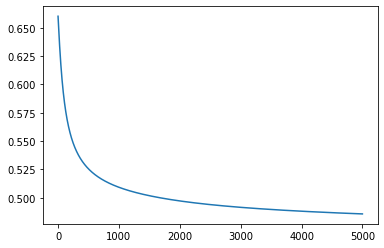

In [12]:
#loading breast-cancer data-set
X, y = load_breast_cancer(return_X_y=True)
y = y.astype('float64')

#splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#scaling data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#defining parameters
n = X_train.shape[1] #number of features
m = X_train.shape[0] #number of training examples
alpha = 0.009 #learning rate
itr = 5000 #number of iterations

#implementing gradient descent
optimizer = tf.compat.v1.train.GradientDescentOptimizer(alpha)
W,b = initialize_weights()
cost_itr = []
for i in range(0, itr):
    optimizer.minimize(compute_cost, var_list=[W, b])
    cost_itr.append(compute_cost())

y_pred = make_predictions()
print_accuracy(y_test, y_pred)
plt.plot(range(0,itr), cost_itr)